In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
data.dropna(inplace= True)

In [20]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [24]:
train_data = x_train.join(y_train)

In [25]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9146,-118.50,34.45,25.0,1290.0,190.0,689.0,216.0,6.0097,<1H OCEAN,220200.0
13310,-117.61,34.09,11.0,2000.0,391.0,1503.0,426.0,4.6167,INLAND,144000.0
15141,-116.90,32.84,18.0,3612.0,737.0,1864.0,713.0,2.7069,<1H OCEAN,153800.0
6274,-117.95,34.03,33.0,1782.0,394.0,1517.0,376.0,3.3389,<1H OCEAN,157900.0
12347,-116.54,33.82,12.0,9482.0,2501.0,2725.0,1300.0,1.5595,INLAND,115600.0
...,...,...,...,...,...,...,...,...,...,...
18136,-122.00,37.35,20.0,4304.0,851.0,2059.0,835.0,5.1674,<1H OCEAN,333000.0
14268,-117.11,32.69,39.0,395.0,159.0,620.0,162.0,2.7250,NEAR OCEAN,86500.0
2729,-115.57,32.80,33.0,1192.0,213.0,1066.0,211.0,4.5714,INLAND,68600.0
16294,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,INLAND,59200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

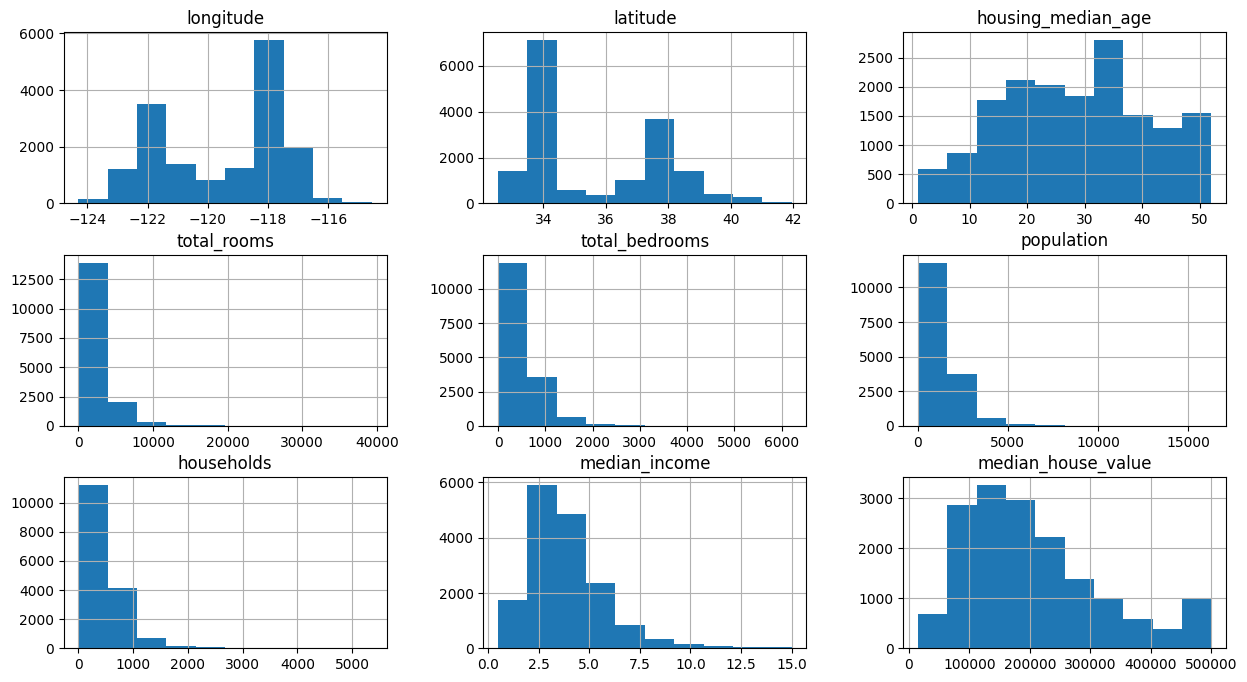

In [27]:
train_data.hist(figsize= (15,8))

In [28]:
train_data.corr()

<ipython-input-28-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924606,-0.116639,0.047854,0.071624,0.104965,0.059661,-0.011600,-0.043269
latitude,-0.924606,1.000000,0.017083,-0.038185,-0.068059,-0.112979,-0.074064,-0.082882,-0.146942
housing_median_age,-0.116639,0.017083,1.000000,-0.362645,-0.323681,-0.305490,-0.305891,-0.115173,0.111258
total_rooms,0.047854,-0.038185,-0.362645,1.000000,0.929504,0.861163,0.917259,0.198027,0.133379
total_bedrooms,0.071624,-0.068059,-0.323681,0.929504,1.000000,0.883351,0.978476,-0.008627,0.048314
population,0.104965,-0.112979,-0.305490,0.861163,0.883351,1.000000,0.913826,0.005173,-0.026130
households,0.059661,-0.074064,-0.305891,0.917259,0.978476,0.913826,1.000000,0.012488,0.063874
median_income,-0.011600,-0.082882,-0.115173,0.198027,-0.008627,0.005173,0.012488,1.000000,0.689864
median_house_value,-0.043269,-0.146942,0.111258,0.133379,0.048314,-0.026130,0.063874,0.689864,1.000000


<ipython-input-31-a77c419ca12a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

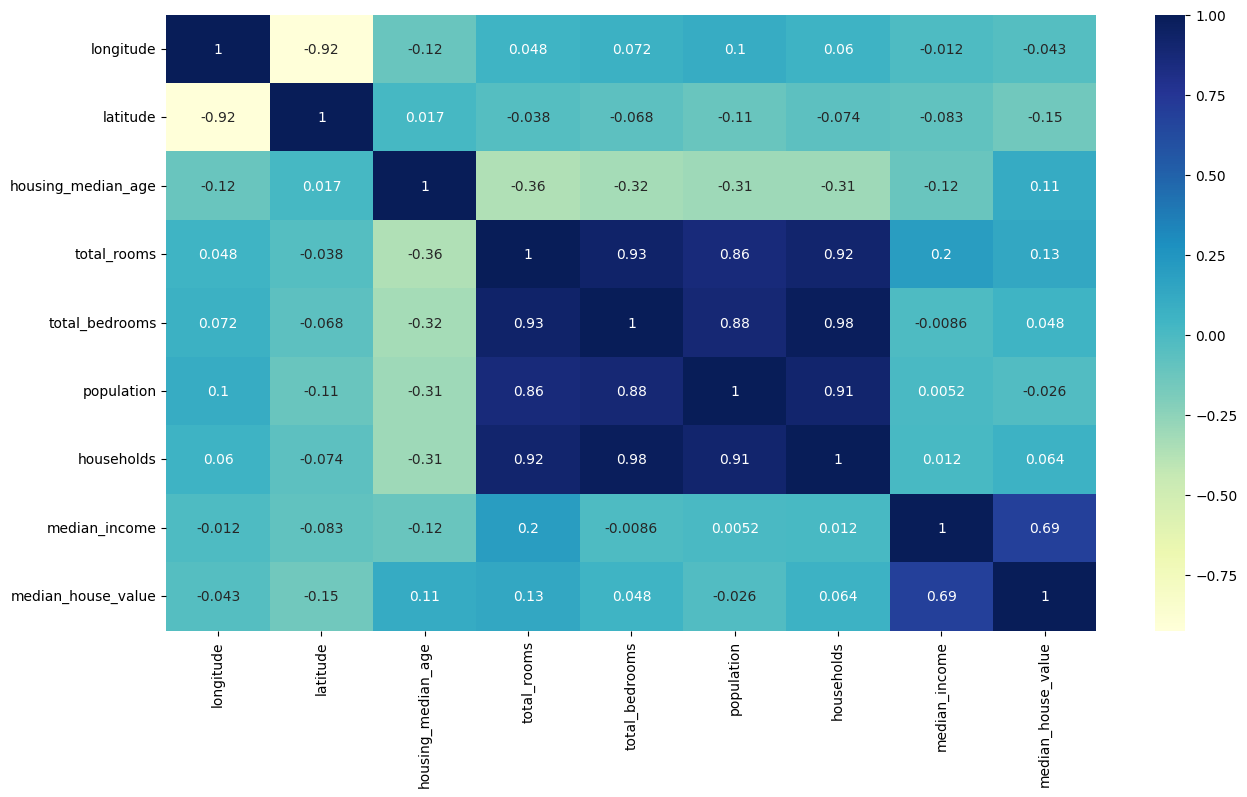

In [31]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [32]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

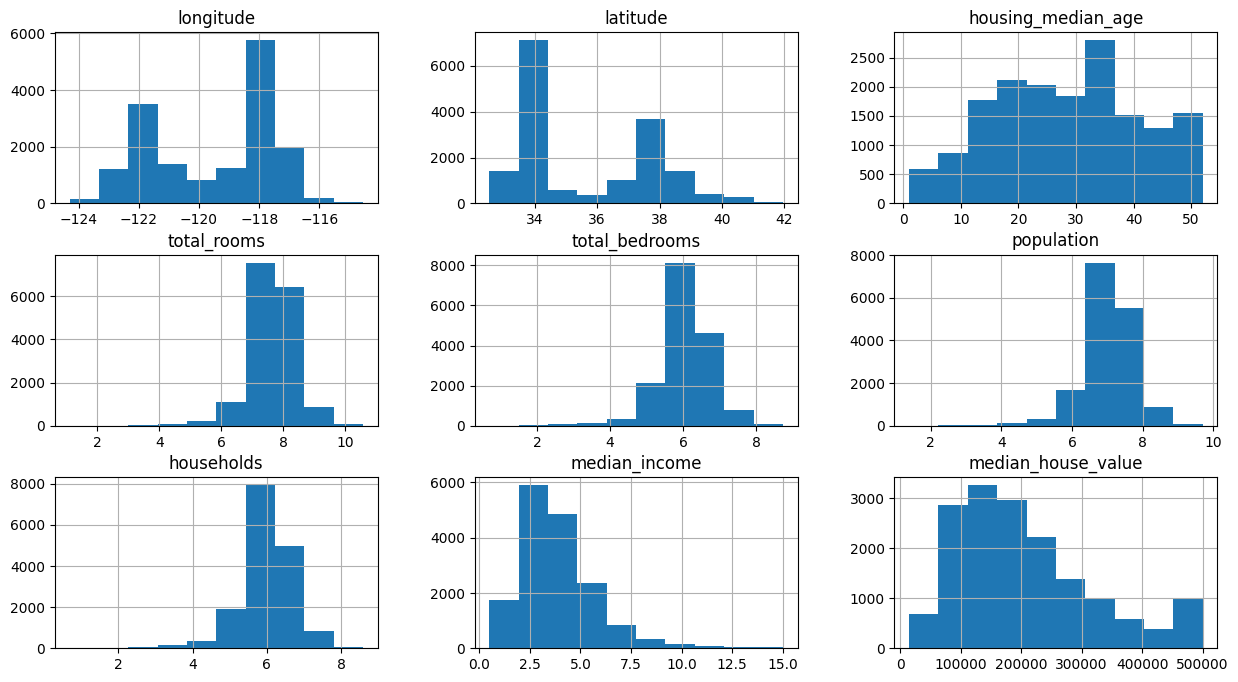

In [33]:
train_data.hist(figsize= (15,8))

In [34]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7176
INLAND        5233
NEAR OCEAN    2116
NEAR BAY      1817
ISLAND           4
Name: ocean_proximity, dtype: int64

In [36]:
train_data = data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   <1H OCEAN           16346 non-null  float64
 10  INLAND              16346 non-null  float64
 11  ISLAND              16346 non-null  float64
 12  NEAR BAY            16346 non-null  float64
 13  NEAR OCEAN          16346 non-null  float64
dtypes: float64(14)
memory usage: 2.8 MB


In [39]:
train_data.dropna(inplace= True)

In [41]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,0.0,1.0,0.0,0.0,0.0
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

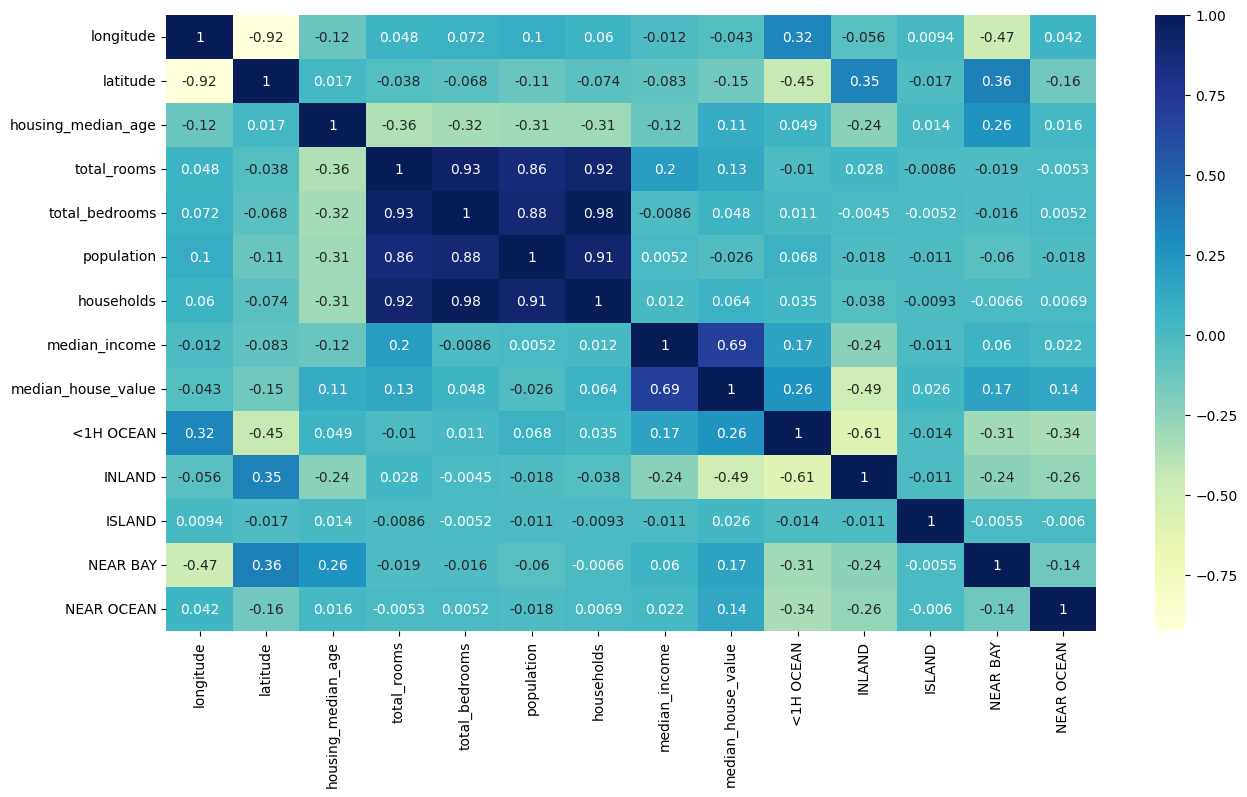

In [42]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

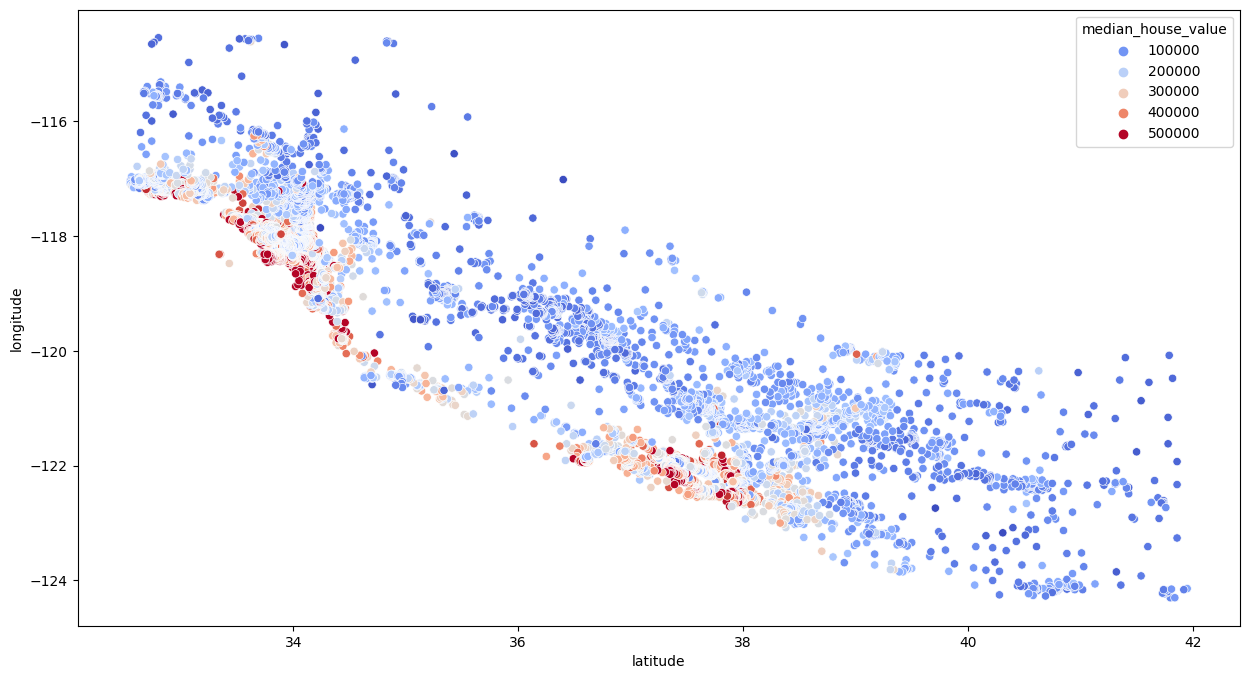

In [44]:
plt.figure(figsize = (15,8))
sns.scatterplot(x= 'latitude', y = 'longitude', data = train_data, hue= 'median_house_value', palette='coolwarm')

In [45]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

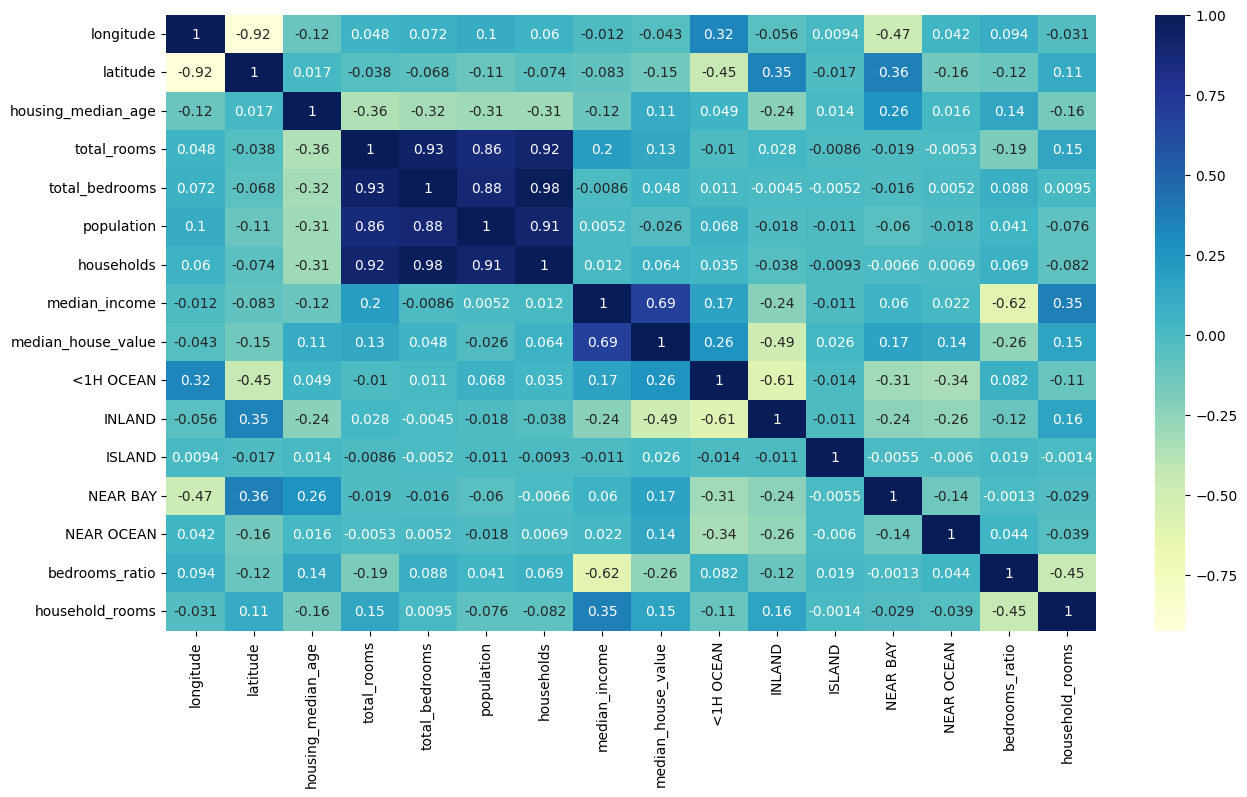

In [46]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [51]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data.dropna(inplace= True)

test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [55]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio,household_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,0.146591,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,0.155797,6.238137
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0,0.0,0.0,0.0,1.0,0.0,0.223917,4.478142
27,-122.28,37.85,52.0,1898.0,421.0,1102.0,397.0,1.8080,105500.0,0.0,0.0,0.0,1.0,0.0,0.221812,4.780856
30,-122.28,37.84,49.0,1916.0,447.0,863.0,378.0,1.9274,122300.0,0.0,0.0,0.0,1.0,0.0,0.233299,5.068783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,0.0,1.0,0.0,0.0,0.0,0.200743,5.461929
20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,0.0,1.0,0.0,0.0,0.0,0.179799,6.388514
20621,-121.47,39.01,37.0,1244.0,247.0,484.0,157.0,2.3661,77500.0,0.0,1.0,0.0,0.0,0.0,0.198553,7.923567
20624,-121.41,39.04,16.0,1698.0,300.0,731.0,291.0,3.0739,87200.0,0.0,1.0,0.0,0.0,0.0,0.176678,5.835052


In [56]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [57]:
reg.score(x_test,y_test)

0.6331014380201229

In [58]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_test, y_test)


RandomForestRegressor()

In [59]:
forest.score(x_test, y_test)

0.965412699861573

In [61]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
best_forest = grid_search.best_estimator_

In [64]:
best_forest.score(x_test, y_test)

0.7712506882239305